### 数据准备

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


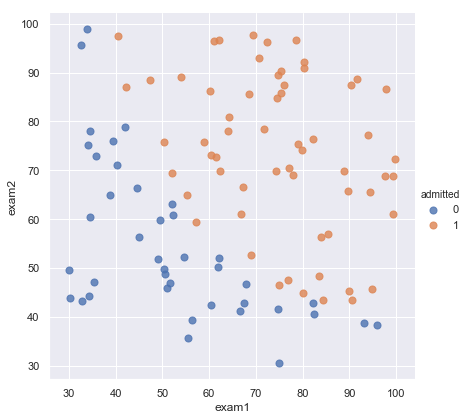

In [4]:
sns.set(context="notebook", style="darkgrid")
sns.lmplot('exam1', 'exam2', hue='admitted', data=data, height=6, fit_reg=False, scatter_kws={"s": 50})
plt.show()

#### 读取特征

In [5]:
def get_X(data):
    ones = pd.DataFrame({'ones': np.ones(len(data))})
    data = pd.concat([ones, data], axis=1)
    return data.iloc[:, :-1].values

#### 读取标签

In [6]:
def get_y(data):
    return np.array(data.iloc[:, -1])

#### 特征缩放

In [7]:
def normalize_features(data):
    return data.apply(lambda column: (column - column.mean()) / column.std())

In [8]:
X = get_X(data)
y = get_y(data)

### Sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

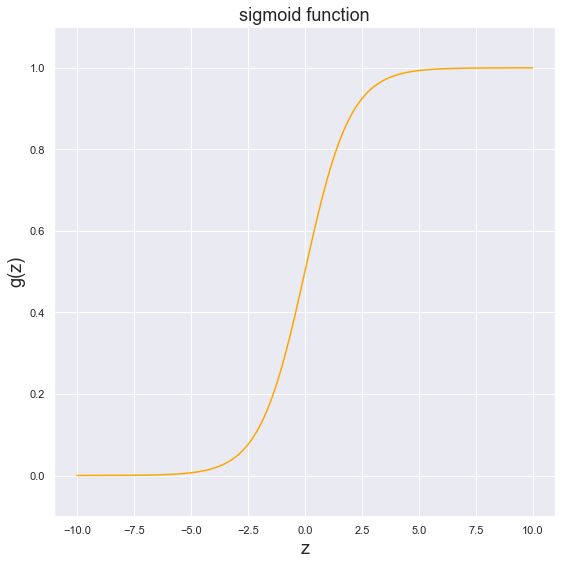

In [10]:
fig, ax = plt.subplots(figsize=(8, 9))
ax.plot(np.arange(-10, 10, step=.01), sigmoid(np.arange(-10, 10, step=.01)), color='orange')
ax.set_ylim(-.1, 1.1)
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

#### 代价函数
$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

In [11]:
theta = np.zeros(3)

In [12]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1- sigmoid(X @ theta)))

In [13]:
cost(theta, X, y)

0.6931471805599453

#### 批量梯度下降 todo
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m} X^T( Sigmoid(X\theta) - y )$$

In [14]:
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X@theta) - y)

In [15]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

### 参数拟合
> * 待与手动梯度下降实现得到的结果进行对比 
> * 此处使用scipy的optimize函数计算最佳参数

In [16]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
res

     fun: 0.20349770172083584
     jac: array([1.98942032e-06, 1.34698328e-04, 1.47259166e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 30
    njev: 270
  status: 0
 success: True
       x: array([-25.16227358,   0.20623923,   0.20147921])

#### 训练集预测和验证

In [17]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob>=.5).astype(int)

In [18]:
final_theta = res.x
y_pred = predict(X, final_theta)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



### 寻找决策边界
> $X \times \theta = 0$  (this is the line)

In [19]:
# find the equation?
coef = -(res.x / res.x[2])
coef

array([124.88769463,  -1.0236254 ,  -1.        ])

In [20]:
x = np.arange(130, step=.1)
y2 = coef[0] + coef[1]*x

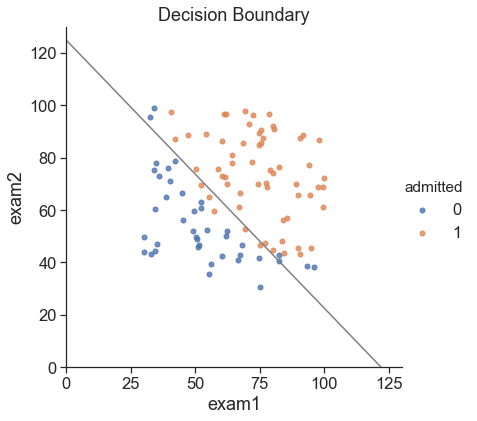

In [21]:
sns.set(context='notebook', style='ticks', font_scale=1.5)
sns.lmplot('exam1', 'exam2', hue='admitted', data=data, height=6, fit_reg=False, scatter_kws={'s': 25})
plt.plot(x, y2, 'grey')
plt.title("Decision Boundary")
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.show()

### 第二组数据
> * 拟合复杂图形需要多项式函数，引入特征映射
> * 多项式易出现过拟合现象，引入正则化

In [22]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


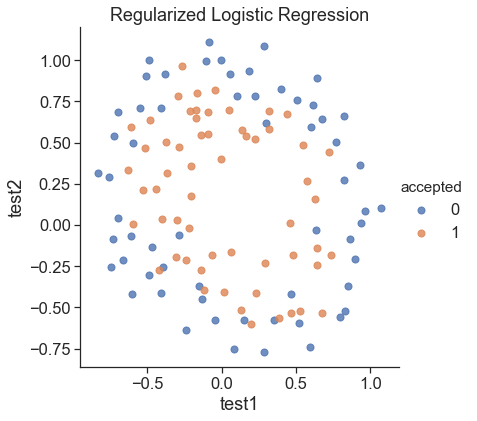

In [23]:
sns.set(context='notebook', style='ticks', font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, height=6, fit_reg=False, scatter_kws={'s':50})

plt.title('Regularized Logistic Regression')
plt.show()

#### 特征映射 -- Feature Mapping
![1](./mapped_feature.png)

特征个数为： 1 + ... + power + (power + 1)
> * power = 2, 个数为 1 + 2 + 3 = 6
> * power = 3, 个数为 1 + 2 + 3 + 4 = 10

In [24]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {
        f"f{i - p}{p}": np.power(x, i - p) * np.power(y, p)
        for i in np.arange(power + 1)
        for p in np.arange(i + 1)
    }
    
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [25]:
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [26]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [27]:
data = feature_mapping(x1, x2, power=6)
data.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [28]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


In [29]:
theta_2 = np.zeros(data.shape[1])
X_2 = feature_mapping(x1, x2, power=6, as_ndarray=True)
X_2.shape

(118, 28)

In [30]:
y_2 = get_y(df)
y_2.shape

(118,)

### 正则化逻辑回归 todo

#### 正则化代价函数
$$\begin{align}
  & J\left( \theta  \right) =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} + \dfrac {\lambda }{2m}\sum ^{i}_{j=1}\theta ^{2}_{j}\\ 
\end{align}$$

In [37]:
def regularized_cost(theta, X, y, lambda_=1):
    '''
    don't penalize theta_0
    '''
    theta_1_to_n = theta[1:]
    regularized_term = (lambda_ / (2 *len(X))) * (np.power(theta_1_to_n, 2)).sum()
#     another version
#     regularized_term = np.mean(theta_1_to_n.T @ theta_1_to_n) * (lambda_ / 2)
    return cost(theta, X, y) + regularized_term

In [38]:
regularized_cost(theta_2, X_2, y_2)

0.6931471805599454

#### 正则化梯度下降
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} x_{j}^{(i) }\right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [33]:
def regularized_gradient(theta, X, y, lambda_=1):
    theta_1_to_n = theta[1:]
    regularized_theta = (lambda_ / len(X)) * theta_1_to_n
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    return gradient(theta, X, y) + regularized_term

In [34]:
regularized_gradient(theta_2, X_2, y_2)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

#### 正则参数拟合

In [35]:
import scipy.optimize as opt

In [39]:
print(f"init cost = {regularized_cost(theta_2, X_2, y_2)}")
res_2 = opt.minimize(fun=regularized_cost, x0=theta_2, args=(X_2, y_2), method='Newton-CG', jac=regularized_gradient)
res_2

init cost = 0.6931471805599454


     fun: 0.5290027297127441
     jac: array([ 1.54870314e-07, -2.30339187e-08,  1.05194709e-07, -2.13638988e-08,
        1.35433434e-08, -2.09571826e-08, -1.06058236e-08,  1.07713839e-08,
       -1.17112168e-08,  3.73430474e-08, -2.56934688e-08,  5.54769114e-09,
       -3.70602099e-09,  6.21900916e-09, -2.49548992e-08, -6.86056913e-09,
        1.14148652e-09, -8.84803802e-09,  1.38273162e-10, -1.44901890e-08,
        3.18800340e-08, -2.71199349e-08,  3.58253209e-09, -3.17930699e-09,
        3.81328962e-10, -6.97891205e-09, -4.31628887e-09,  1.96607949e-09])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 72
  status: 0
 success: True
       x: array([ 1.27273884,  0.62527229,  1.18108857, -2.01996139, -0.91742466,
       -1.43166451,  0.12400659, -0.3655345 , -0.35723957, -0.17513034,
       -1.45815648, -0.05098933, -0.61555456, -0.27470664, -1.19281652,
       -0.24218794, -0.20600622, -0.04473094, -0.27778462, -0.29537854,
       -0.4

#### 预测

In [41]:
final_theta = res_2.x
y_pred = predict(X_2, final_theta)
print(classification_report(y_2, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

   micro avg       0.83      0.83      0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



### 使用不同的 $\lambda$ 的决策边界
* 我们找到所有满足 $X\times \theta = 0$ 的x
* instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them

In [69]:
def feature_mapped_logistic_regresssion(power, lambda_):
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)
    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(fun = regularized_cost,
                      x0 = theta,
                      args = (X, y, lambda_),
                      method = 'TNC',
                      jac = regularized_gradient)
    final_theta = res.x
    return final_theta

In [70]:
def find_decision_boundary(density, power, theta, threshold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)
    
    coordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*coordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)
    
    inner_product = mapped_cord.values @ theta
    decision = mapped_cord[np.abs(inner_product) < threshold]
    
    return decision.f10, decision.f01

In [71]:
def draw_boundary(power, lambda_):
    density = 1000
    threshold = 2 * 10 ** -3
    
    final_theta = feature_mapped_logistic_regresssion(power, lambda_)
    x, y = find_decision_boundary(density, power, final_theta, threshold)
    
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, height=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

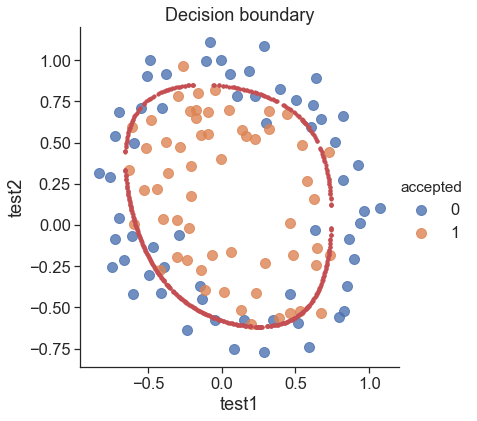

In [74]:
draw_boundary(6, 1)

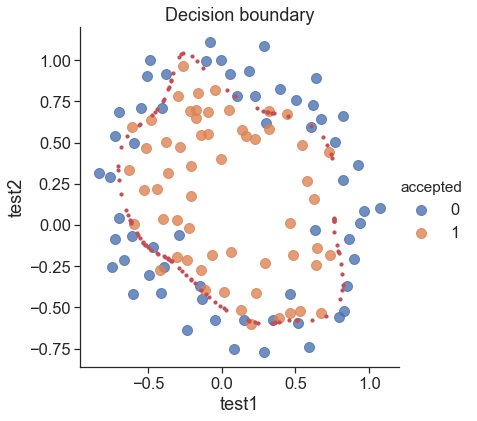

In [73]:
# overfitting
draw_boundary(6, 0)

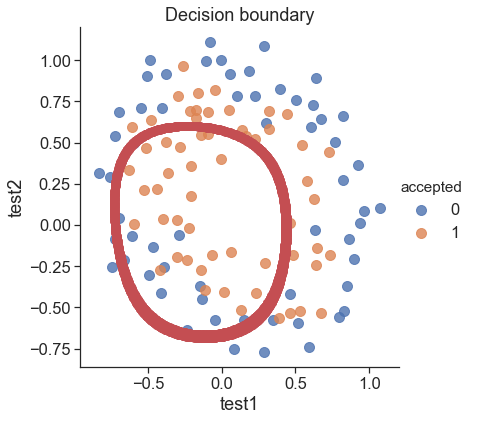

In [72]:
# underfitting
draw_boundary(power=6, lambda_=100)